In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random
style.use('fivethirtyeight')

In [2]:
#xs = np.array([1,2,3,4,5,6], dtype = np.float64)
#ys = np.array([5,4,6,5,6,7], dtype = np.float64)

In [3]:
def create_dataset(hm, variance, step = 2, correlation = False):
    val =  1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype = np.float64), np.array(ys, dtype = np.float64)
    

In [15]:
xs, ys =  create_dataset(40, 10, 2, correlation = 'pos')

In [5]:
def best_fit_slope_and_intercept(xs, ys):
    m = (((mean(xs) * mean(ys)) - (mean(xs * ys))) / ((mean(xs) ** 2) - mean(xs**2)))
    b = mean(ys )  - m * mean(xs)
    return m, b
m, b = best_fit_slope_and_intercept(xs, ys)

In [6]:
print(m, b)

2.122607879924952 -1.065853658536561


In [7]:
regression_line = [(m * x ) + b for x in xs]

In [8]:
predict_x = 8
predict_y = (m * predict_x) + b

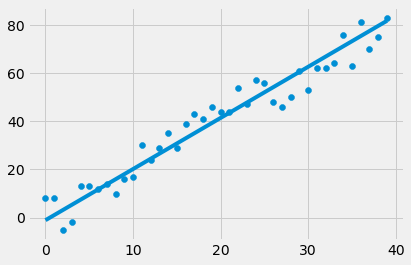

In [16]:
plt.scatter(xs, ys)
#plt.scatter(predict_x, predict_y)
plt.plot(xs, regression_line)
plt.show()

In [10]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig) ** 2)

def coefficient_of_det(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 -(squared_error_regr / squared_error_y_mean)

In [11]:
#xs, ys =  create_dataset(40, 40, 2, correlation = 'pos')

In [17]:
r_sqaured = coefficient_of_det(ys, regression_line)
print(r_sqaured)

0.9385013509197339
